# Preprocessing: Null value handling, standardization, replace categorical values with numeric values (e.g. 0, 1, 2 etc.)

In [1]:
import pandas as pd
df=pd.read_csv('forestfires.csv')



# Null Values Handling

In [2]:
# Assuming your dataset is stored in a variable 'df'
# Drop rows with any missing values
df.dropna(inplace=True)

# Or, impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)


<ipython-input-2-1c1338503cd3>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


# Standardization

In [3]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# Replace categorical values with numeric values (e.g. 0, 1, 2 etc.)

In [5]:
selected_columns = df[['month','day']]
print(selected_columns)

     month  day
0        7    0
1       10    5
2       10    2
3        7    0
4        7    3
..     ...  ...
512      1    3
513      1    3
514      1    3
515      1    2
516      9    5

[517 rows x 2 columns]


In [4]:
# Assuming 'month' and 'day' are categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])


In [6]:
selected_columns = df[['month','day']]
print(selected_columns)

     month  day
0        7    0
1       10    5
2       10    2
3        7    0
4        7    3
..     ...  ...
512      1    3
513      1    3
514      1    3
515      1    2
516      9    5

[517 rows x 2 columns]


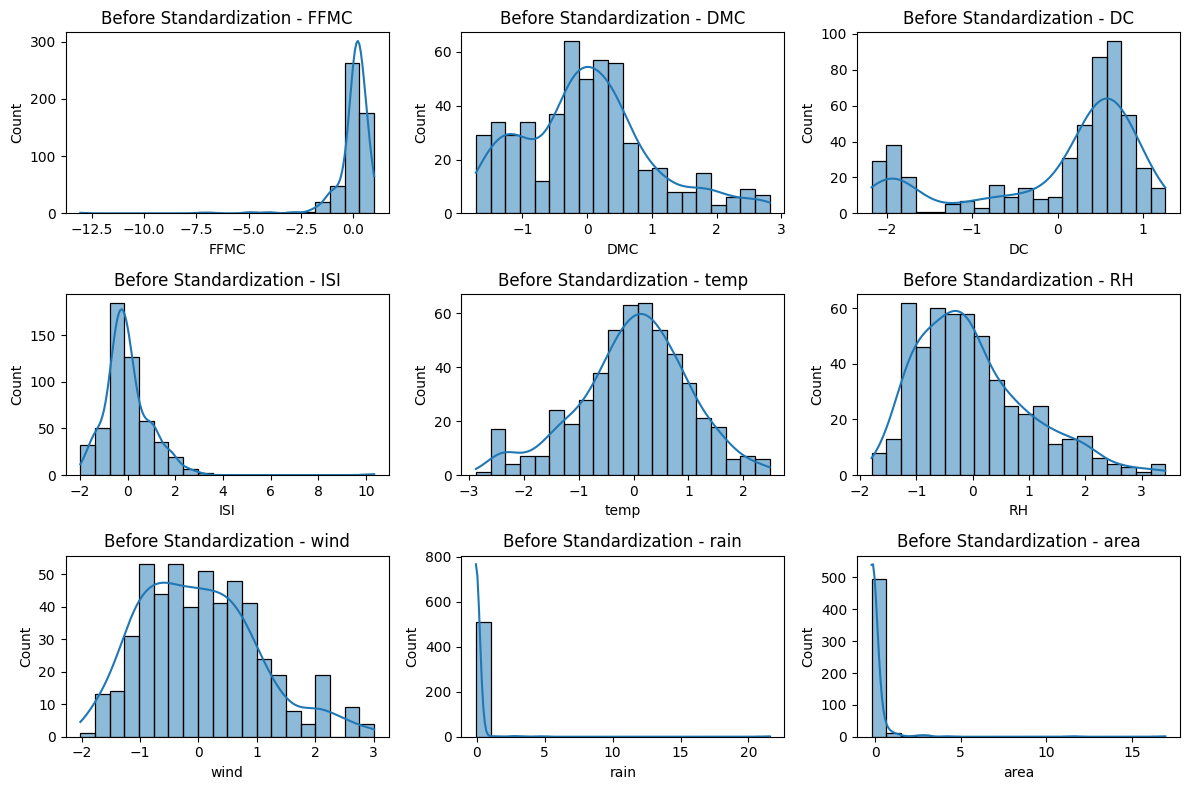

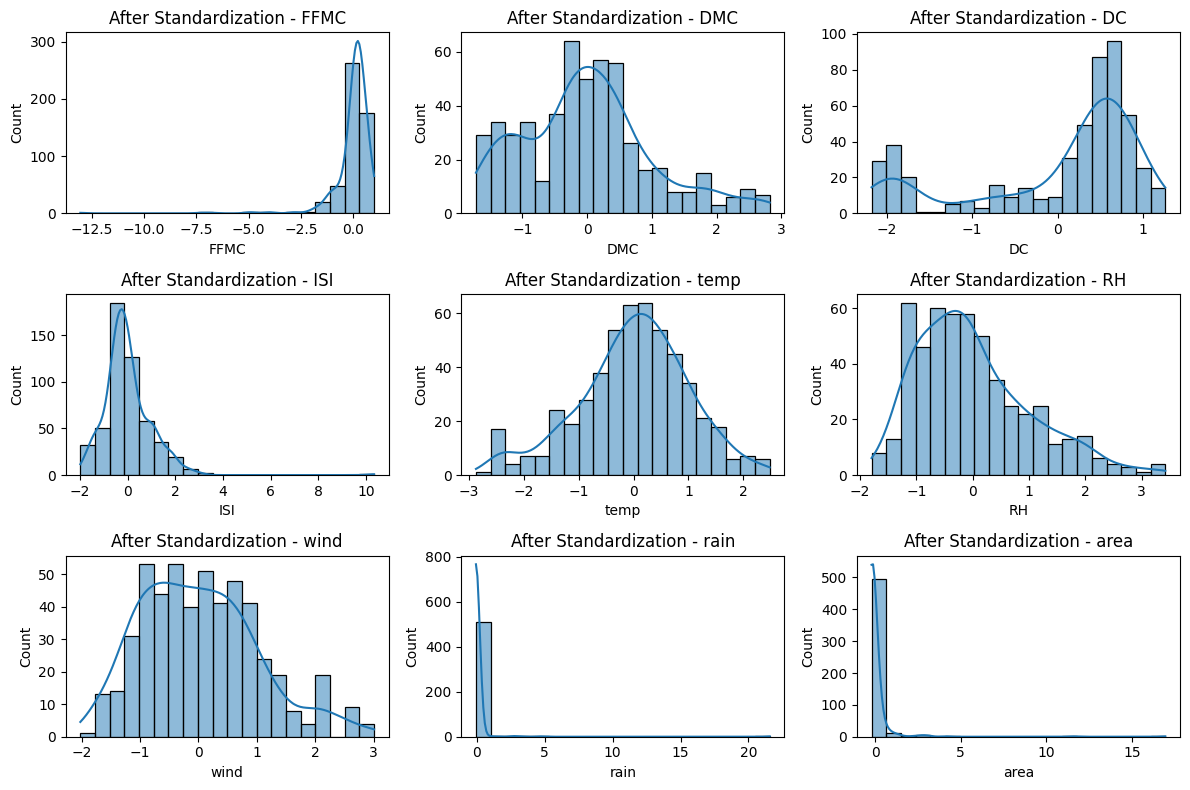

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'
numerical_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Plot histograms before standardization
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Before Standardization - {column}')

plt.tight_layout()
plt.show()

# Standardize the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Plot histograms after standardization
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'After Standardization - {column}')

plt.tight_layout()
plt.show()


# c.Data splitting: Split data as 70% train and 30% test using train_test_split function.

In [14]:
from sklearn.model_selection import train_test_split

X = df[['X', 'Y', 'temp']]  # Adjust this based on the features you want to include
y = df['area']  # Adjust this based on your target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (361, 3)
X_test shape: (156, 3)
y_train shape: (361,)
y_test shape: (156,)


# D.Fit model using fit function taking a single feature at a time and all independent features at a time.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing sets

# Initialize the Linear Regression model
model_single_feature = LinearRegression()
model_all_features = LinearRegression()

# Iterate over each feature and fit the model one feature at a time
for feature in X_train.columns:
    # Using a single feature
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]

    # Fit the model
    model_single_feature.fit(X_train_single, y_train)

    # Make predictions
    y_pred_single = model_single_feature.predict(X_test_single)

    # Evaluate the model
    mse_single = mean_squared_error(y_test, y_pred_single)
    print(f'Mean Squared Error for {feature}: {mse_single}')

# Fit the model with all independent features
model_all_features.fit(X_train, y_train)
y_pred_all_features = model_all_features.predict(X_test)

# Evaluate the model
mse_all_features = mean_squared_error(y_test, y_pred_all_features)
print(f'Mean Squared Error for all features: {mse_all_features}')


Mean Squared Error for X: 1.9740481605744076
Mean Squared Error for Y: 1.9699347003875152
Mean Squared Error for temp: 1.9551801649652207
Mean Squared Error for all features: 1.958262405764974


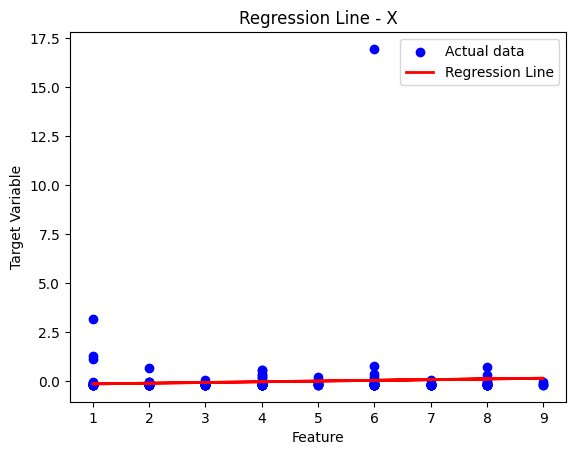

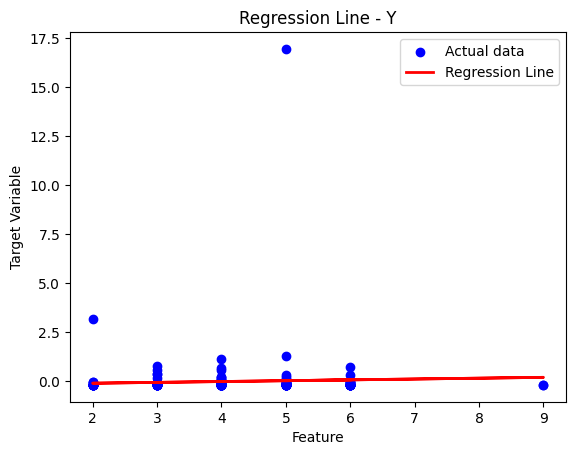

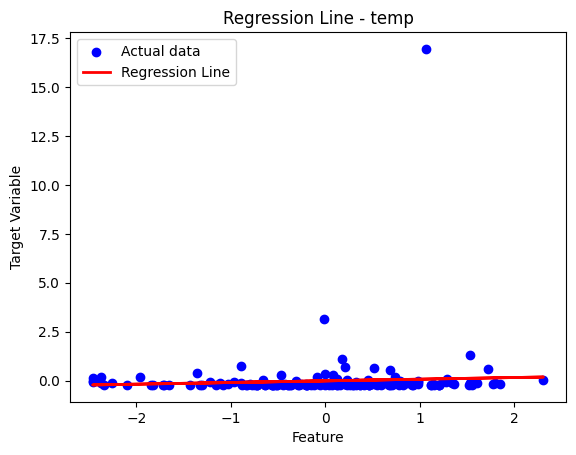

ValueError: x and y must be the same size

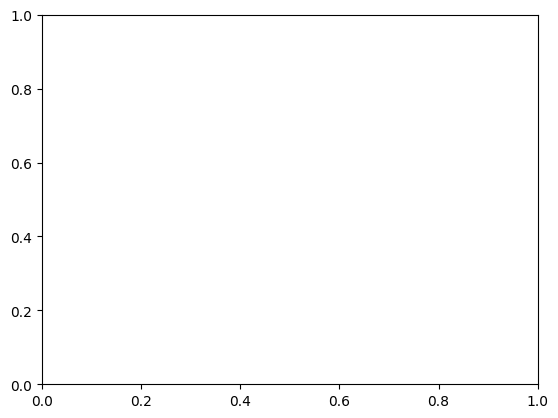

In [10]:
import matplotlib.pyplot as plt

# Function to plot the regression line
def plot_regression_line(X, Y, y_pred, title):
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()

# Iterate over each feature and plot the regression line
for feature in X_train.columns:
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]

    model_single_feature.fit(X_train_single, y_train)
    y_pred_single = model_single_feature.predict(X_test_single)

    plot_regression_line(X_test_single, y_test, y_pred_single, f'Regression Line - {feature}')

# Plot the regression line for all features
plot_regression_line(X_test, y_test, y_pred_all_features, 'Regression Line - All Features')


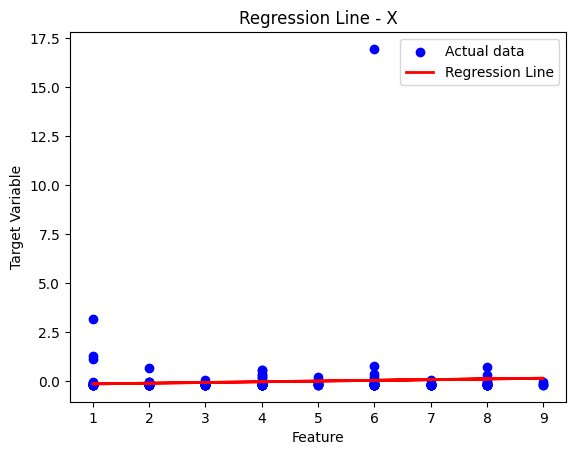

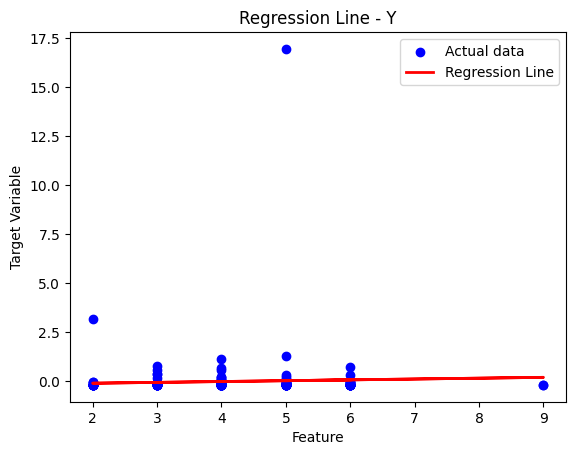

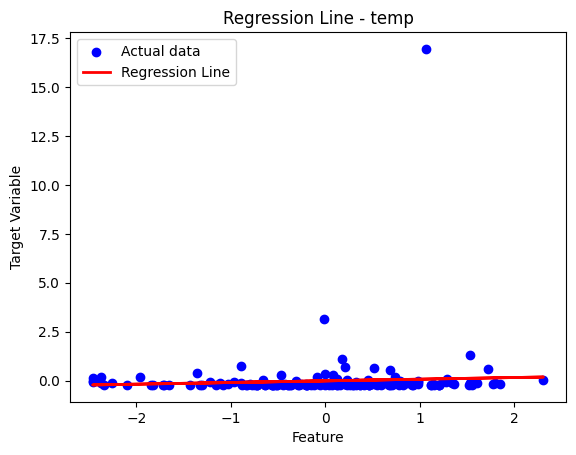

ValueError: x and y must be the same size

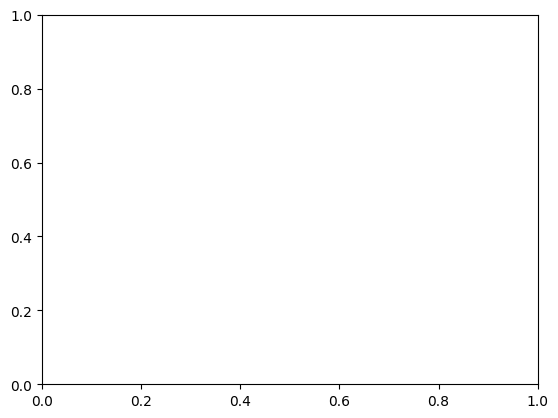

In [15]:
# Function to plot the regression line
import matplotlib.pyplot as plt
def plot_regression_line(X, y, y_pred, title):
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel('Feature' if X.shape[1] == 1 else 'Index')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()

# Iterate over each feature and plot the regression line
for feature in X_train.columns:
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]

    model_single_feature.fit(X_train_single, y_train)
    y_pred_single = model_single_feature.predict(X_test_single)

    plot_regression_line(X_test_single, y_test, y_pred_single, f'Regression Line - {feature}')

# Plot the regression line for all features
plot_regression_line(X_test, y_test, y_pred_all_features, 'Regression Line - All Features')
